In [2]:

print(segmentation.shape)

(14055, 14055)


No configuration for shape_dilation found, parameter will be set to 0
No configuration for shape_erosion found, parameter will be set to 0
No configuration for binary_smoothing found, parameter will be set to 3
No configuration for convolution_smoothing found, parameter will be set to 15
No configuration for poly_compression_factor found, parameter will be set to 30
No configuration for path_optimization found, parameter will be set to hilbert
No configuration for greedy_k found, parameter will be set to 0
No configuration for segmentation_channel found, parameter will be set to 15
No configuration for hilbert_p found, parameter will be set to 7
No configuration for xml_decimal_transform found, parameter will be set to 100
No configuration for distance_heuristic found, parameter will be set to 300
No configuration for processes found, parameter will be set to 10
No configuration for join_intersecting found, parameter will be set to True
sanity check for cell set 0
cell set 0 passed san

100%|██████████| 13803/13803 [00:05<00:00, 2532.90it/s]

Calculating polygons



100%|██████████| 13803/13803 [01:56<00:00, 118.59it/s]


Polygon calculation finished
Current path length: 28,473,081.29 units
Path optimizer defined in config: hilbert
Optimized path length: 1,054,117.37 units
Optimization factor: 27.0x


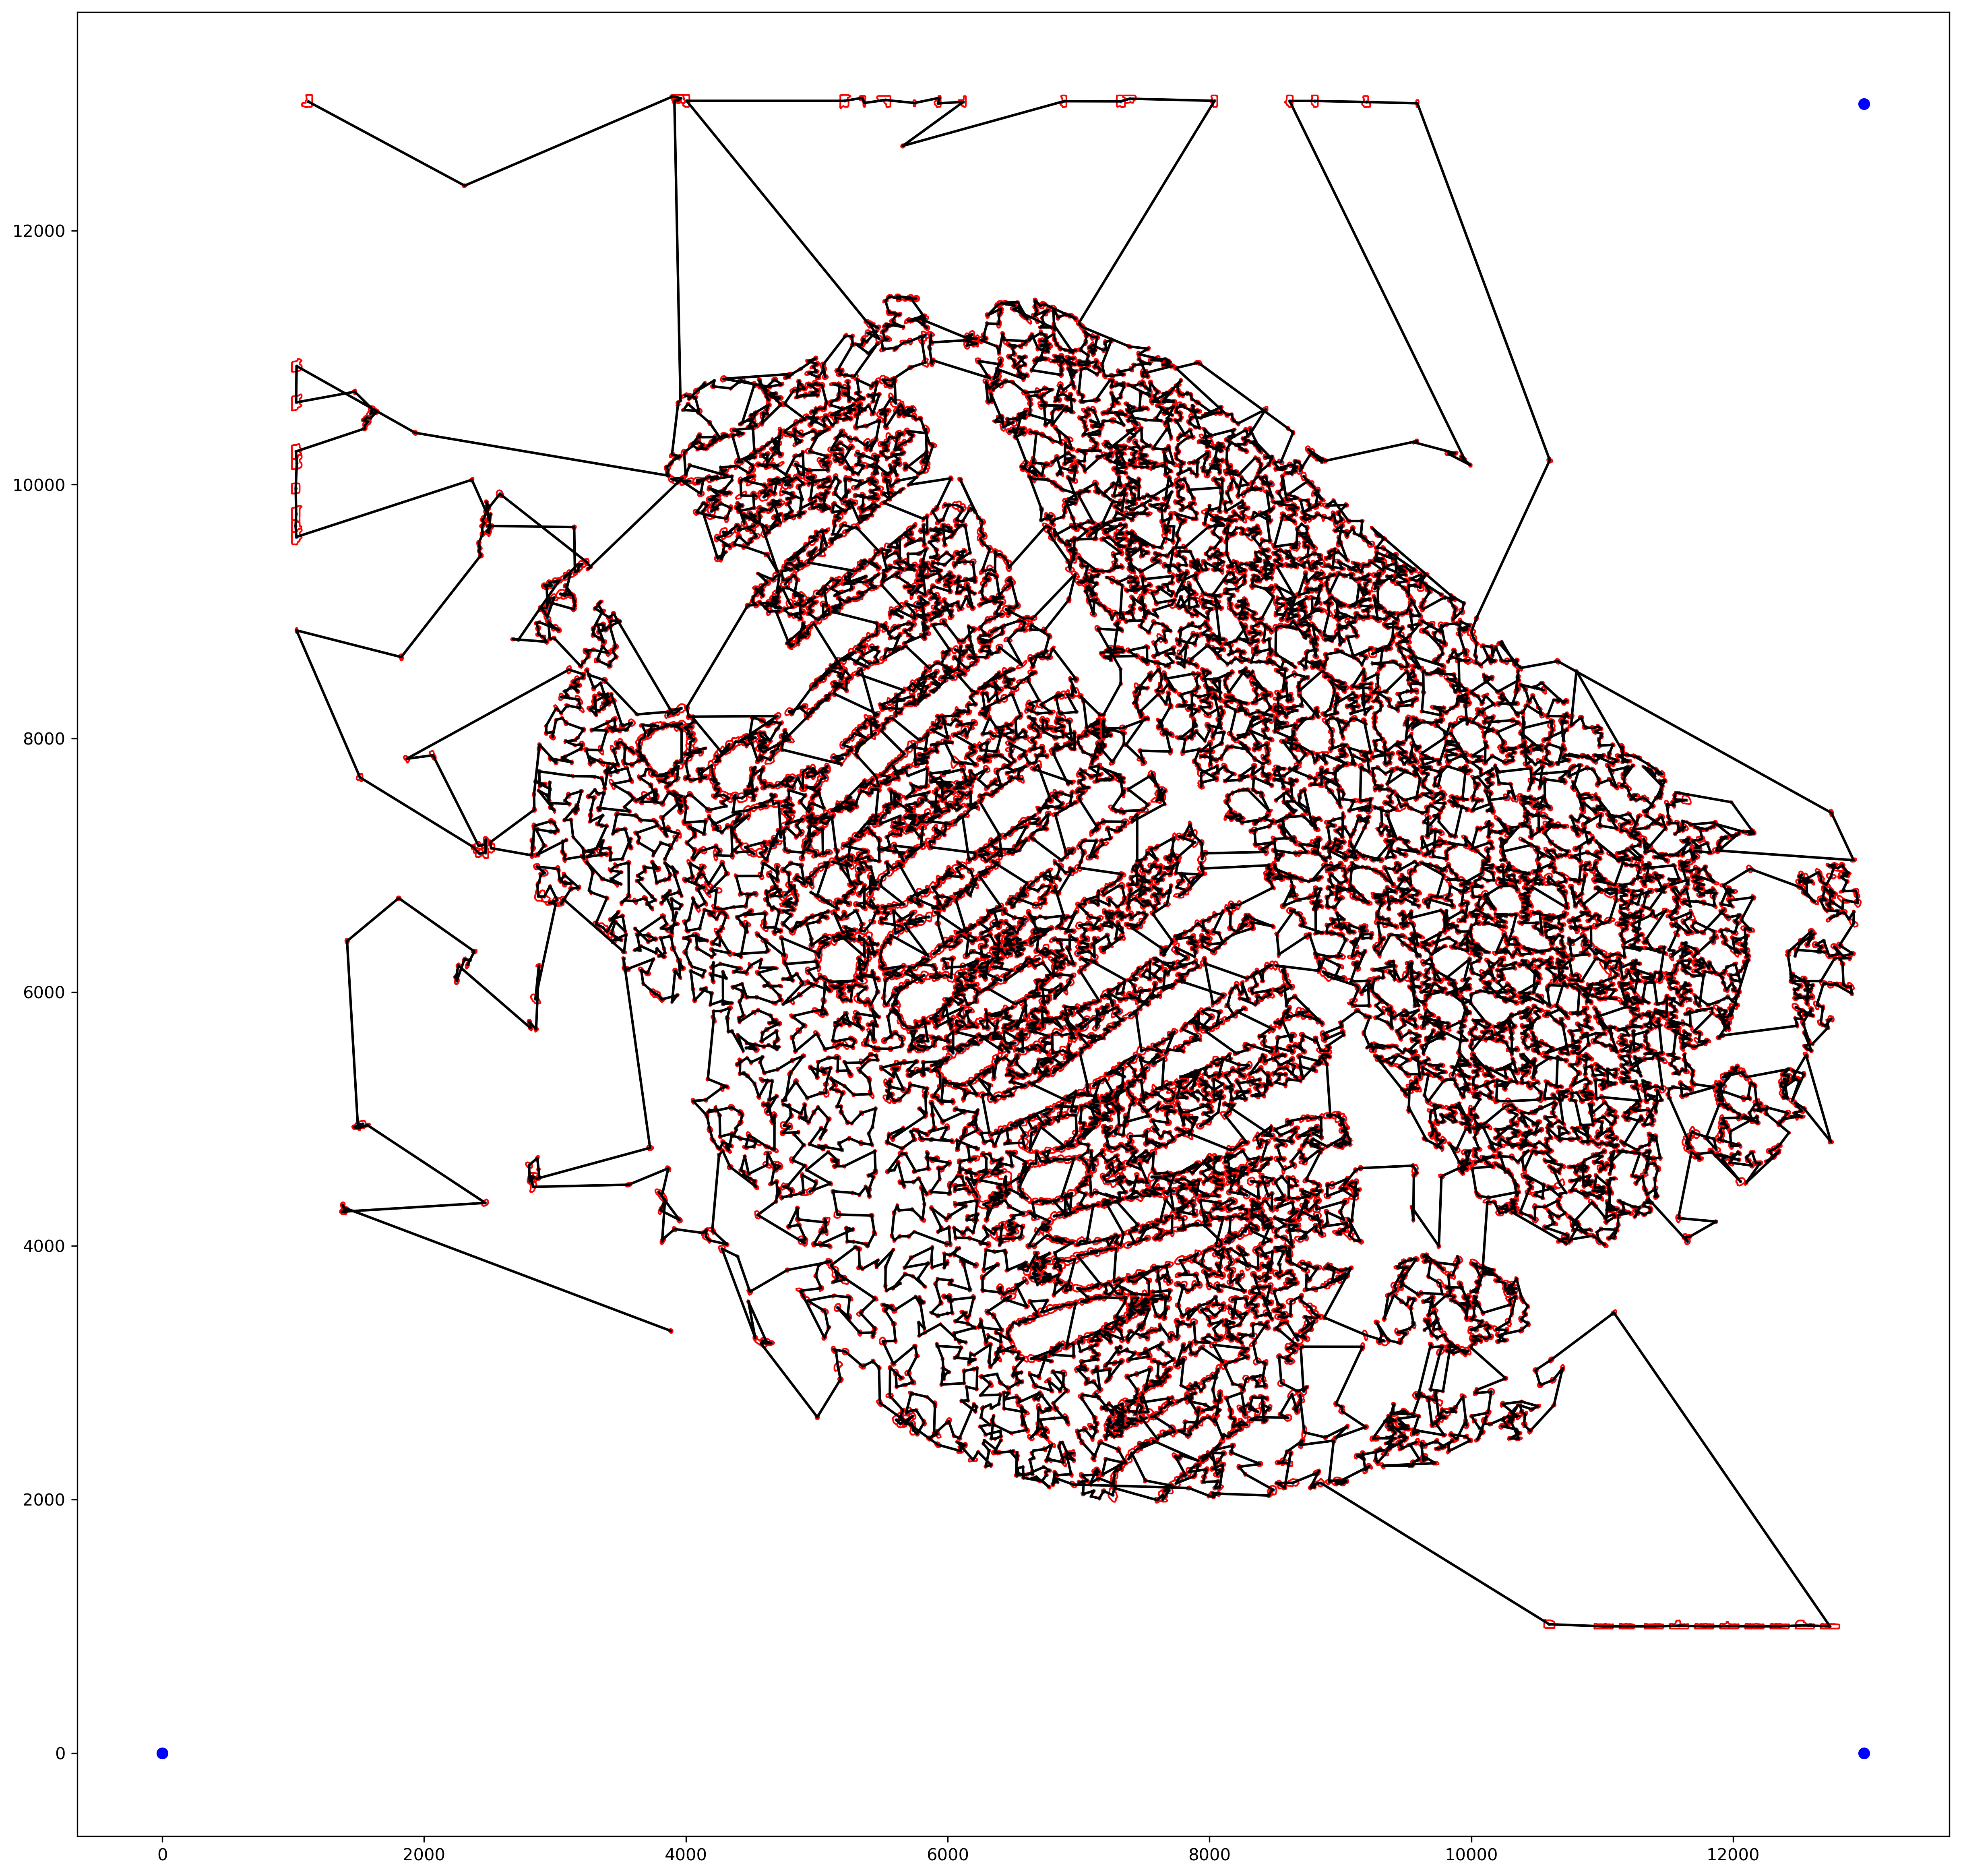

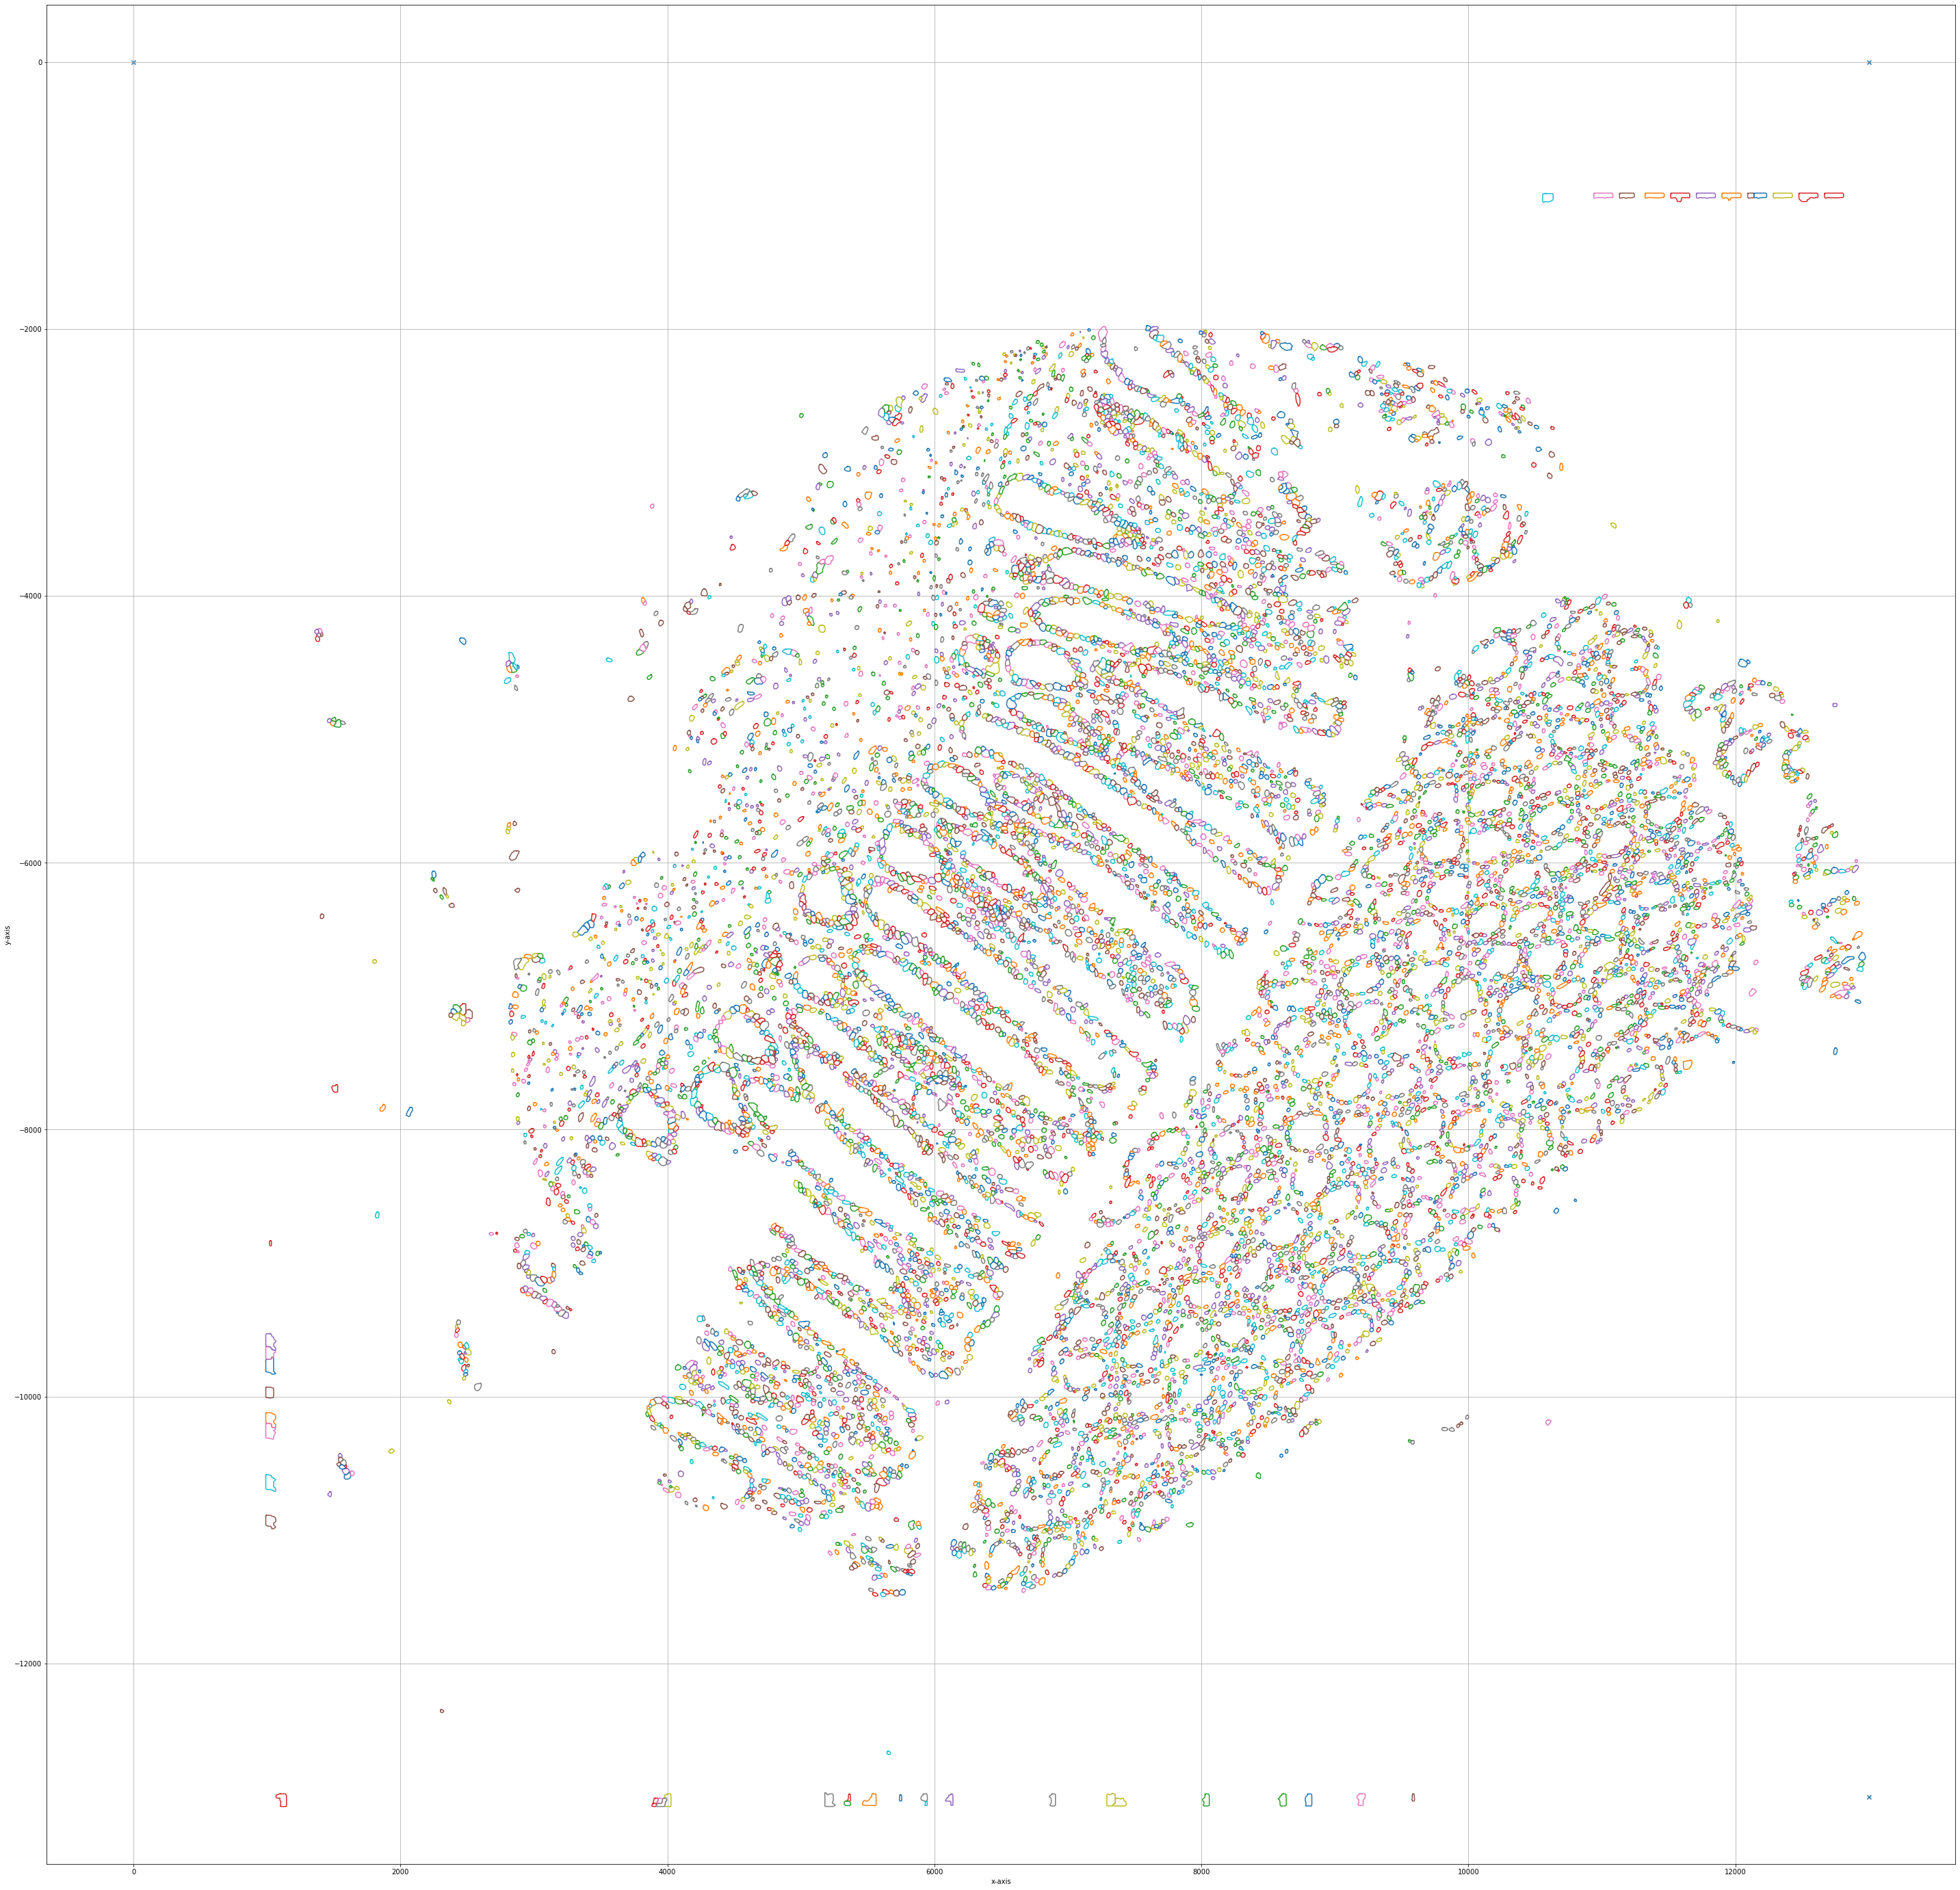

In [3]:
import numpy as np
from PIL import Image
from lmd.lib import SegmentationLoader

import tifffile
im = tifffile.imread('/Users/georgwallmann/Documents/testdaten/cell.ome.tif')
segmentation = np.array(im).astype(np.uint32)

all_classes = np.unique(segmentation)

cell_sets = [{"classes": all_classes, "well": "A1"}]

calibration_points = np.array([[0,0],[0,13000],[13000,13000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]])
}

sl = SegmentationLoader(config = loader_config, verbose=True)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.plot(fig_size = (50, 50), save_name='big.png')

In [4]:
shape_collection.stats()

===== Collection Stats =====
Number of shapes: 13,803
Number of vertices: 134,385
Mean vertices: 10
Min vertices: 3
5% percentile vertices: 6
Median vertices: 9
95% percentile vertices: 15
Max vertices: 32
